<a href="https://colab.research.google.com/github/hrd1409/python-ml-projects/blob/master/MEDICAL_INSURANCE_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

IMPORTING DATASET

In [3]:
data=pd.read_csv("/content/insurance (1).csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


EDA

In [4]:
data.shape

(1338, 7)

In [5]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-7-4a9b20ddd442>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


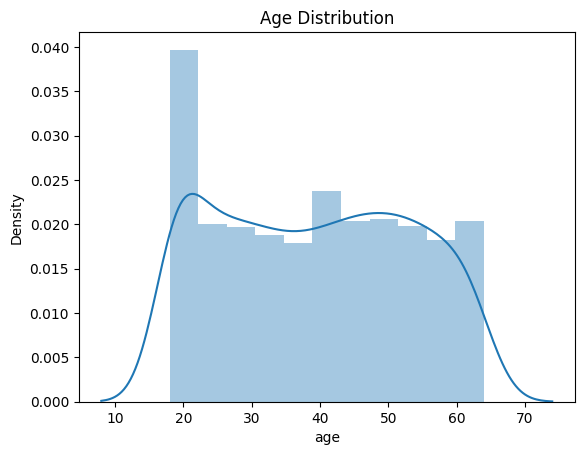

In [7]:
import seaborn as sns
sns.distplot(data['age'])
plt.title("Age Distribution")
plt.show()

In [10]:
data.sex.value_counts()

,count
sex,
male,676
female,662


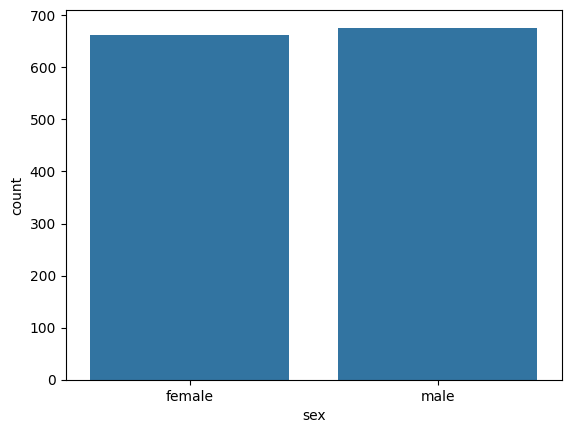

In [12]:
sns.countplot(x='sex',data=data)
plt.show()

<ipython-input-16-3be14198b447>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


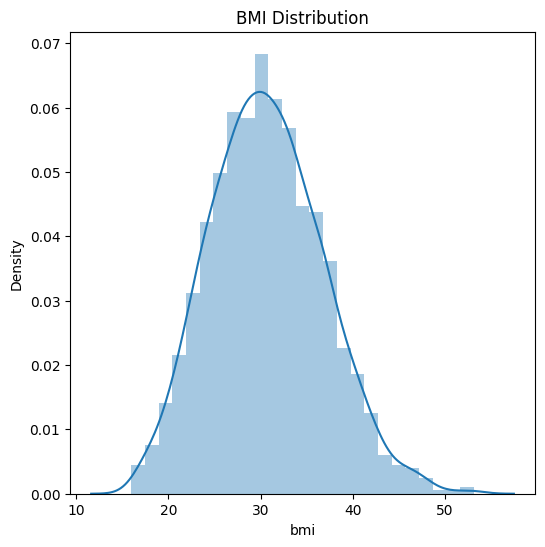

In [16]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

In [17]:
data.children.value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


[]

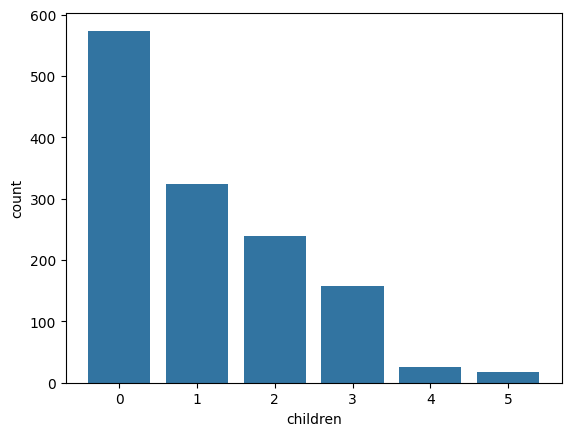

In [18]:
sns.countplot(x='children',data=data)
plt.plot()

In [19]:
data.smoker.value_counts()

,count
smoker,
no,1064
yes,274


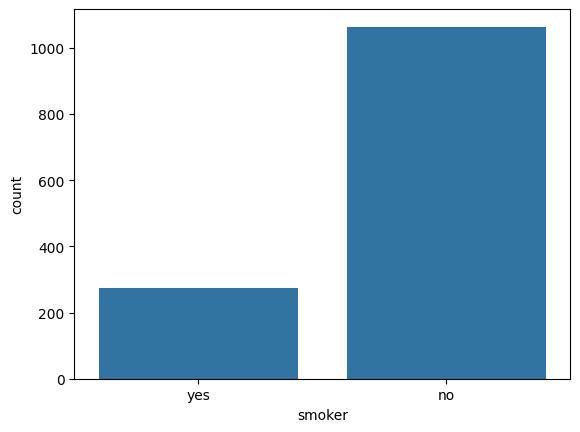

In [20]:
sns.countplot(x='smoker',data=data)
plt.show()

In [21]:
data.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [22]:
data.charges.mean()

13270.422265141257

In [23]:
data.charges.max()

63770.42801

<ipython-input-26-b948f17e0457>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


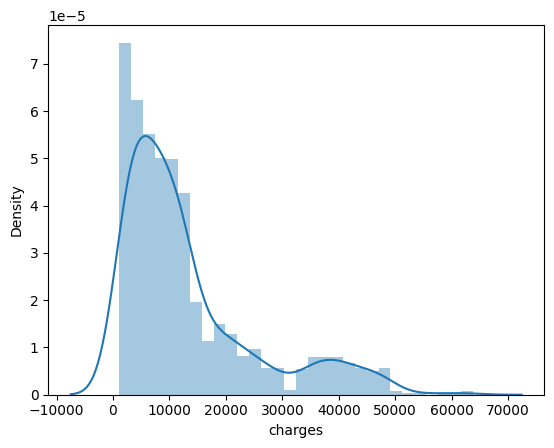

In [26]:
sns.distplot(data['charges'])
plt.show()

In [29]:
data.replace({'sex':{'male':1,'female':0}},inplace=True)
data.replace({'smoker':{'yes':1,'no':0}},inplace=True)
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

<ipython-input-29-716d702d8c3d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'male':1,'female':0}},inplace=True)
<ipython-input-29-716d702d8c3d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'yes':1,'no':0}},inplace=True)
<ipython-input-29-716d702d8c3d>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.s

In [30]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


DATASET SPLITTING

In [33]:
x=data.drop('charges',axis=1)
y=data['charges']

In [34]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

LINEAR REGRESSION

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [37]:
reg=LinearRegression()

In [38]:
reg.fit(x_train,y_train)

LinearRegression()

In [42]:
training_pred=reg.predict(x_train)

In [43]:
# R squared value
r2_train = metrics.r2_score(y_train, training_pred)
print('R squared vale : ', r2_train)

R squared vale :  0.7418272241542367


In [45]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = reg.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[27532.51847941]
The insurance cost is USD  27532.518479406197


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
